# **ConvNet 1 - Introduction, Working with own dataset**

## **Part 1 Let's start with Convnet - Mnist dataset**
We will use Convnet layers to classify MNIST digits, a task that you have analysed using a densely-connected network (test accuracy was 97.8%).

### **Dataset**  
Please reuse the code from the second exercise, which has already covered the MNIST database.
Change the shape of the training testing images to tensor (60000, 28, 28, 1) and (10000, 28, 28, 1).


In [2]:
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical


traning_shape = (60000, 28, 28, 1)
testing_shape = (10000, 28, 28, 1)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print the shape of the data
print(train_images.shape)
print(test_images.shape)

# change the shape of the data
train_images = train_images.reshape(traning_shape) / 255
test_images = test_images.reshape(testing_shape) / 255

# print the new shape of the data
print(train_images.shape)
print(test_images.shape)

# cateregorical labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

2023-11-08 17:39:33.025326: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 17:39:33.069797: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 17:39:33.069840: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 17:39:33.069872: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 17:39:33.078353: I tensorflow/core/platform/cpu_feature_g

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Convnet architecture**
A basic convnet architecture is a a stack of Conv2D and MaxPooling2D layers followed by the classification part.
A convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images.

Pass the argument input_shape=(28, 28, 1) to our first layer
Number of channels is controlled by the first argument passed to each Conv2D layer (here 32 or 64).
The filters should have size 3×3.  

Layers:
```python
model.add(layers.Conv2D(nb of filters, (filter size, filter size), activation='relu', input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filter size, filter size)))
```

Please implement a ConvNet architecture consisting of 3 Conv2d layers with nb. of channels: 32→64→64. Between the Conv2d should be a MaxPolling2D layer with filter:size 2×2.  
Display the architecture:

In [3]:
from keras import models
from keras import layers

# parameters
image_height = 28
image_width = 28
image_channels = 1
filter_size_conv = 3
filter_size_max_pool = 2

model = models.Sequential()
model.add(layers.Conv2D(32, (filter_size_conv, filter_size_conv), activation='relu', input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((filter_size_max_pool, filter_size_max_pool)))
model.add(layers.Conv2D(64, (filter_size_conv, filter_size_conv), activation='relu'))
model.add(layers.MaxPooling2D((filter_size_max_pool, filter_size_max_pool)))
model.add(layers.Conv2D(64, (filter_size_conv, filter_size_conv), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

The next step would be to feed our last output tensor (of shape (3, 3, 64)) into a densely-connected **classifier network**: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top.

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### **Training and evaluation**
Since we are facing a multi-class classification problem the best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

Parameters:
* rmsprop optimizer
* categorical_crossentropy loss function
* accuracy metric

Fit the model for 5 epochs and batch size 64.

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

fit = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 22s 22ms/step - loss: 0.1793 - accuracy: 0.9435
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0500 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0197 - accuracy: 0.9938


Verify your model on a test set. You should achieve test accuracy of about 0.99  
Display the loss and accuracy curves on a plot.

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 2s 7ms/step - loss: 0.0418 - accuracy: 0.9885


In [7]:
import matplotlib.pyplot as plt
def plot_metric(history_dict, metric):
    plt.clf()  # clear figure
    loss_values = history_dict[metric]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'go', label=f'Training {metric}')
    plt.title(f'Training and validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

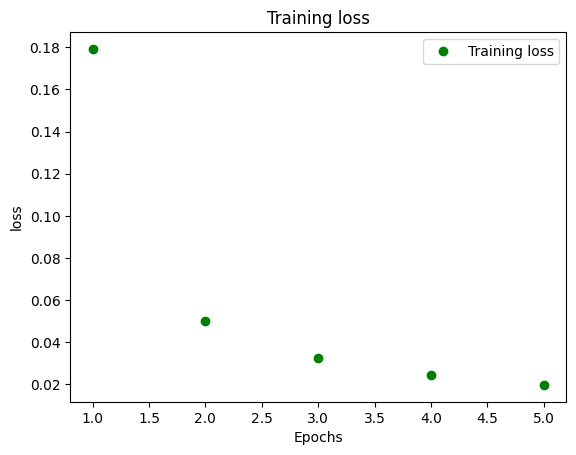

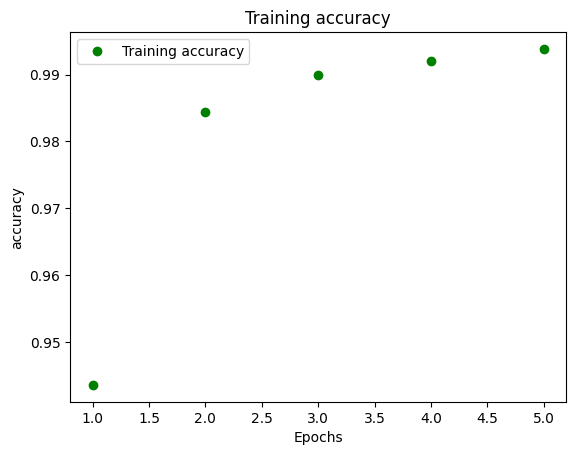

In [8]:
fit_dict = fit.history
fit_dict.keys()

# Display the loss and accuracy curves on a plot.
for key in fit_dict.keys():
    plt.clf()  # clear figure
    values = fit_dict[key]
    epochs = range(1, len(values) + 1)
    plt.plot(epochs, values, 'go', label=f'Training {key}')
    plt.title(f'Training {key}')
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.show()


## **Part 2 ConvNet for small dataset**
Having to train an image classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training – 1,000 for validation, and 1,000 for testing.

### **Dataset**
Download the original dataset at https://www.kaggle.com/c/dogs-vs-cats/data (create a Kaggle account if you don't already have one).
If you use Google Colab and don't want to download the whole dataset on your computer, you can link a Kaggle account with Colab. For further information see link below: https://www.kaggle.com/general/74235

This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is ~800MB large (compressed). After downloading and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.
As we only need 4000 images, you do not need to download the whole dataset. You can download only train set (~500MB large) or copy the first 4000 images from someone else in the group.

After downloading the data, you have to arrange them correctly in the catalogues. Data should be split into separate catalogs for dogs and for cats. You can do it manually or in python (for example using os and shutil libraries).

```
main_directory/
...train/
......class_a/
.........a_image_1.jpg
.........a_image_2.jpg
......class_b/
.........b_image_1.jpg
.........b_image_2.jpg
...validation/
......class_a/
.........a_image_1.jpg
.........a_image_2.jpg
......class_b/
.........b_image_1.jpg
.........b_image_2.jpg
```

Please check the train/validation/test datasets. We now have 2000 training images, then 1000 validation images and 1000 test images (optional). In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.

### **Network architecture**
You've already built a small convnet for MNIST in the previous exercise. You will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150×150 (a somewhat arbitrary choice), we end up with feature maps of size 7×7 right before the Flatten layer. Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148×148 to 7×7). This is a pattern that you will see in almost all convnets. Since we are attacking a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

Please create your network architecture based on the information above (4x Conv2d, 4x Maxpooling layers and then Flatten, 2 x Dense layer).


In [9]:
new_model = models.Sequential()
new_model.add(layers.Rescaling(scale=1./255, input_shape=(150, 150, 3)))
new_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

Compilation step:
- RMSprop optimizer - with learning rate parameter(lr=1e-4)
- Binary crossentropy loss funtion
- Accuracy metric

In [10]:
learning_rate = 1e-4
new_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

### **Data preprocessing**
Data preprocessing steps include the following:
- Read the picture files.
- Decode the JPEG content to RBG grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. It has a module with image processing helper tools, located at tensorflow.keras.preprocessing. In particular, it contains the class ImageDataGenerator (In older version of tensorflow only. It is now replaced by image_dataset_from_directory) which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here. One of the useful properties of ImageDataGenerator is the ability to automatically label data based on which folder they are in. That is why, at the beginning of the exercise, we put dogs and cats into the appropriate folders.

In [11]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dir = 'cats_and_dogs_small/train'
train_dataset = image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

validation_dir = 'cats_and_dogs_small/validation'
validation_dataset = image_dataset_from_directory(
    validation_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Let's fit our model to the dataset. We may pass a validation_data argument.

In [12]:
new_fit = new_model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
100/100 [==============================] - 24s 237ms/step - loss: 0.6930 - accuracy: 0.5195 - val_loss: 0.6881 - val_accuracy: 0.6100
Epoch 2/30
100/100 [==============================] - 23s 233ms/step - loss: 0.6828 - accuracy: 0.5555 - val_loss: 0.6720 - val_accuracy: 0.6050
Epoch 3/30
100/100 [==============================] - 23s 228ms/step - loss: 0.6629 - accuracy: 0.6030 - val_loss: 0.6690 - val_accuracy: 0.5970
Epoch 4/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6352 - accuracy: 0.6370 - val_loss: 0.6282 - val_accuracy: 0.6420
Epoch 5/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6045 - accuracy: 0.6790 - val_loss: 0.6244 - val_accuracy: 0.6490
Epoch 6/30
100/100 [==============================] - 22s 223ms/step - loss: 0.5592 - accuracy: 0.7195 - val_loss: 0.5839 - val_accuracy: 0.6980
Epoch 7/30
100/100 [==============================] - 22s 222ms/step - loss: 0.5421 - accuracy: 0.7290 - val_loss: 0.5829 - val_ac

### **Outcome analysis**
Plot the loss and accuracy of the model over the training and validation data during training.

In [13]:
new_dict = new_fit.history
new_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

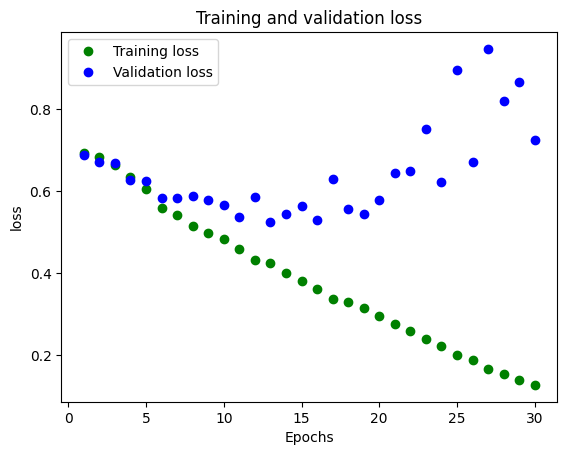

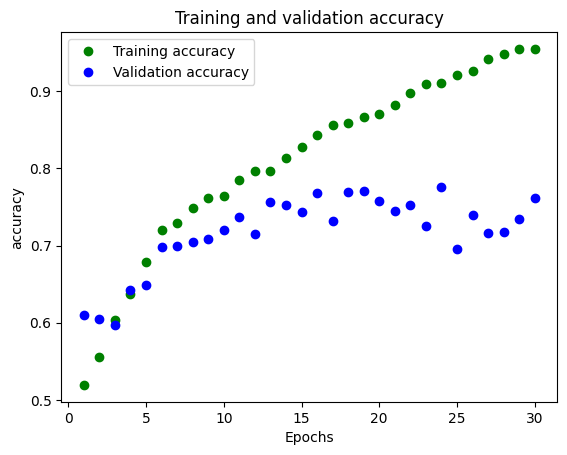

In [14]:
import matplotlib.pyplot as plt

def plot_metric(dict, metric):
    plt.clf()  # clear figure
    loss_values = dict[metric]
    val_loss_values = dict[f'val_{metric}']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'go', label=f'Training {metric}')
    plt.plot(epochs, val_loss_values, 'bo', label=f'Validation {metric}')
    plt.title(f'Training and validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_metric(new_dict, 'loss')
plot_metric(new_dict, 'accuracy')

In these plots, you should see that the model is overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. There are many techniques that can help mitigate overfitting, such as reducing the number of epochs, adding dropout layers dropout, or weight decay (L2 regularization). We will look at them next weeks.